In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Problem statement:-
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

Retaining high profitable customers is the main business goal here.

## Steps:
1. Reading, understanding and visualising the data
2. Preparing the data for modelling
3. Building the model
4. Evaluate the model

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


from scipy.stats import skew
from datetime import datetime

# Sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

# classification model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm

# Read

### Read the data

In [10]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(train.shape)
print(test.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [12]:
data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


#  Data Inspection
1. Display a few rows of the dataset to get a sense of its structure.
2. Check for missing values and handle them appropriately.
3. Explore basic statistics of the dataset (mean, median, standard deviation, etc.).

In [13]:
train.info(verbose =True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

In [14]:
(train.isnull().sum()/len(train)) *100

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_m

In [15]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,69999.0,34999.000000,20207.115084,0.000,17499.5000,34999.000,52498.5000,69998.000
circle_id,69999.0,109.000000,0.000000,109.000,109.0000,109.000,109.0000,109.000
loc_og_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
std_og_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
loc_ic_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
arpu_6,69999.0,283.134365,334.213918,-2258.709,93.5810,197.484,370.7910,27731.088
arpu_7,69999.0,278.185912,344.366927,-1289.715,86.7140,191.588,365.3695,35145.834
arpu_8,69999.0,278.858826,351.924315,-945.808,84.0950,192.234,369.9090,33543.624
onnet_mou_6,67231.0,133.153275,299.963093,0.000,7.4100,34.110,119.3900,7376.710
onnet_mou_7,67312.0,133.894438,311.277193,0.000,6.6750,32.280,115.8375,8157.780


Some Features has no values in mean, min, max, IQR so we will drop that feature

# Data Cleaning
1. Clean or impute missing values.
2. Remove duplicate records if necessary.
3. Correct any data inconsistencies or errors.

In [16]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [17]:
# data is highly skewed so we will use median for missing fill na values for float and int
for feature in train.columns:
    if train[feature].dtypes != 'object':
        skewness = train[feature].skew()
        print(f"Skewness of '{feature}': {skewness}")

Skewness of 'id': 0.0
Skewness of 'circle_id': 0
Skewness of 'loc_og_t2o_mou': 0
Skewness of 'std_og_t2o_mou': 0
Skewness of 'loc_ic_t2o_mou': 0
Skewness of 'arpu_6': 13.700342827550731
Skewness of 'arpu_7': 20.271332375021498
Skewness of 'arpu_8': 19.045774106299618
Skewness of 'onnet_mou_6': 6.140530275668938
Skewness of 'onnet_mou_7': 6.593318250440481
Skewness of 'onnet_mou_8': 7.149100724253364
Skewness of 'offnet_mou_6': 4.933533409292347
Skewness of 'offnet_mou_7': 5.057605910264967
Skewness of 'offnet_mou_8': 6.18421020710315
Skewness of 'roam_ic_mou_6': 16.844320569249692
Skewness of 'roam_ic_mou_7': 27.37308248050083
Skewness of 'roam_ic_mou_8': 25.776788404336997
Skewness of 'roam_og_mou_6': 14.083542921789734
Skewness of 'roam_og_mou_7': 14.273037874007164
Skewness of 'roam_og_mou_8': 23.746728104370458
Skewness of 'loc_og_t2t_mou_6': 13.933248096467356
Skewness of 'loc_og_t2t_mou_7': 15.390717559782741
Skewness of 'loc_og_t2t_mou_8': 19.932183892858017
Skewness of 'loc_og_

In [18]:
def data_prepration(train):
  object_col=[]
  # this method will help to find the missing values more than 70 %
  missing_data = (train.isnull().sum() / len(train) * 100) > 70
  # Filter columns based on the boolean mask
  train_filtered = train.loc[:, ~missing_data]
  #this will loop the dataset columns
  for col in train_filtered:
    #this will check if the dtypes is object
    if train_filtered[col].dtype == 'object':
      # if the dtypes are object it will change the datetime dtype
      train_filtered[col] = pd.to_datetime(train_filtered[col] , format='%m/%d/%Y')
      # fill missing values for datetime object
      train_filtered[col] = train_filtered[col].fillna(train_filtered[col].mode()[0])

    else:
      # fill missing values for float and int features with median
      train_filtered[col] = train_filtered[col].fillna(train_filtered[col].median())
  # remove duplicates if any
  train_filtered.drop_duplicates()
  # empty column to add drop features
  drop_col = []
  for col in train_filtered.columns:
    if train_filtered[col].dtypes != 'object':
      if (train_filtered[col].mean() == 0) and (train_filtered[col].min() == 0) and (train_filtered[col].max() == 0):
          drop_col.append(col)
          # this will create date time feature
  train_filtered.drop(columns=drop_col, inplace=True)
  train_filtered['rech_year_6'] = train_filtered['date_of_last_rech_6'].dt.year
  train_filtered['rech_month_6'] = train_filtered['date_of_last_rech_6'].dt.month
  train_filtered['rech_day_6'] = train_filtered['date_of_last_rech_6'].dt.day
  train_filtered['rech_year_7'] = train_filtered['date_of_last_rech_7'].dt.year
  train_filtered['rech_month_7'] = train_filtered['date_of_last_rech_7'].dt.month
  train_filtered['rech_day_7'] = train_filtered['date_of_last_rech_7'].dt.day
  train_filtered['rech_year_8'] = train_filtered['date_of_last_rech_8'].dt.year
  train_filtered['rech_month_8'] = train_filtered['date_of_last_rech_8'].dt.month
  train_filtered['rech_day_8'] = train_filtered['date_of_last_rech_8'].dt.day
    # this will drop single value features like year
  cat_feature=[]
  for col in train_filtered:
    if train_filtered[col].nunique() < 2:
      if col != 'churn_probability':
        # print(date_df[col].value_counts())
        # print("+"*100)
        cat_feature.append(col)

        train_filtered = train_filtered.drop(columns=cat_feature, errors='ignore')
  train_filtered = train_filtered.drop(train_filtered.select_dtypes(include='datetime64[ns]'), axis=1)

  return train_filtered

In [19]:
# function calling and storing the return dataset on train 1
train_1 = data_prepration(train)

In [20]:
def display_data(train_1):
  print("Before Clean",train.shape)
  print("After Clean",train_1.shape)
  missing_info=pd.concat([train_1.dtypes, train_1.nunique(), train_1.isnull().sum() / len(train) * 100 ], axis=1)
  missing_info.columns=['Data_Types', 'nunique','Missing_Values']
  print("_"*100)

  print(missing_info)

In [21]:
display_data(train_1)

Before Clean (69999, 172)
After Clean (69999, 129)
____________________________________________________________________________________________________
                   Data_Types  nunique  Missing_Values
id                      int64    69999             0.0
arpu_6                float64    61615             0.0
arpu_7                float64    61425             0.0
arpu_8                float64    60194             0.0
onnet_mou_6           float64    20057             0.0
onnet_mou_7           float64    20076             0.0
onnet_mou_8           float64    19726             0.0
offnet_mou_6          float64    26254             0.0
offnet_mou_7          float64    26140             0.0
offnet_mou_8          float64    25996             0.0
roam_ic_mou_6         float64     5306             0.0
roam_ic_mou_7         float64     4240             0.0
roam_ic_mou_8         float64     4252             0.0
roam_og_mou_6         float64     6568             0.0
roam_og_mou_7         f

# NOTES
1. Calculated the missing values in percentage
2. There are lot of features has missing value greater than 70 % we will drop the features whos missing values are more than 70 %
3. 30 features has been removed whos missing values are more than 70 %
4. for remaining columns we have missing values in range 1 to 10 so will use seperate the dtypes if
5. for numerical columns, you might consider imputing missing values with the mean, median, or a constant value.
6. For categorical columns, you can impute missing values with the mode or a new category indicating missing
7. before applying missing values imputation will verify the data
8. we can see all the objects columns are in dates so will convert them on date format
9. will apply mode functions on datetime datatype and median to float and int data types
10. to apply mean or median we have to identify the data distribution
11. Use the mean when your data is approximately normally distributed and not heavily affected by outliers
12. Use the median when your data is skewed or contains outliers.
13. loc_og_t2o_mou Local outgoing calls operator to other operator mobile minutes of usage voice calls all rows shows 0.0 so we can drop this
['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']
14. extracted datetime features in seperate columns
15. rmoved single unique value data columns

In [22]:
eda_df=train.copy()

# Exploratory Data Analysis (EDA)
1. Visualize the data to understand its distribution and patterns.
2. Create histograms, scatter plots, and other visualizations.
3. Identify correlations between variables.

# EDA NOTES
All ID's are unique so we can say there are 69999 row of unique data present in dataset

Also we can say the complete data is from 109 circle id

If you have an imbalance in the distribution of your independent features, it might impact the performance of your machine learning model, particularly if the algorithm is sensitive to class distribution.

will apply below features to overcome Imbalance Distribution

#### Feature Engineering:
Create new features that might better capture the underlying patterns in you
#### Dimensionality Reduction:
Consider using dimensionality reduction techniques like Principal Component Analysis (PCA) to reduce the impact of imbalanced features.
#### Resampling Techniques:
In extreme cases, you might consider resampling your dataset to balance the number of instances for each feature. This might involve oversampling the minority features or undersampling the majority features.

In [23]:
eda_df['id'].nunique()

69999

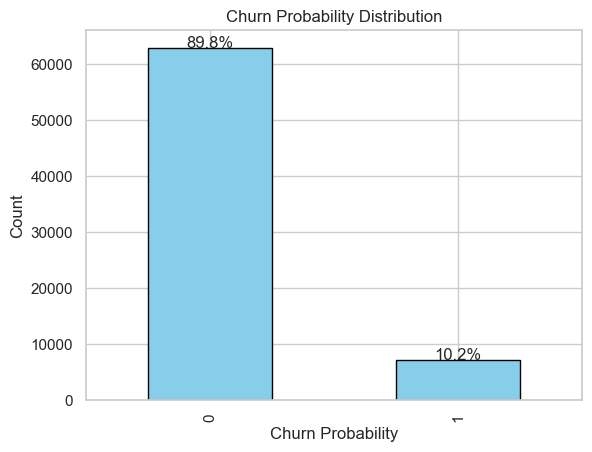

In [24]:
# Assuming eda_df is your DataFrame
sns.set(style="whitegrid")  # Set a seaborn style for better aesthetics

# Plotting the bar plot
ax = eda_df['churn_probability'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
ax.set_xlabel('Churn Probability')
ax.set_ylabel('Count')
ax.set_title('Churn Probability Distribution')

# Adding percentage labels on top of each bar
total = len(eda_df['churn_probability'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01, f'{height/total:.1%}', ha="center")

# Display the plot
plt.show()

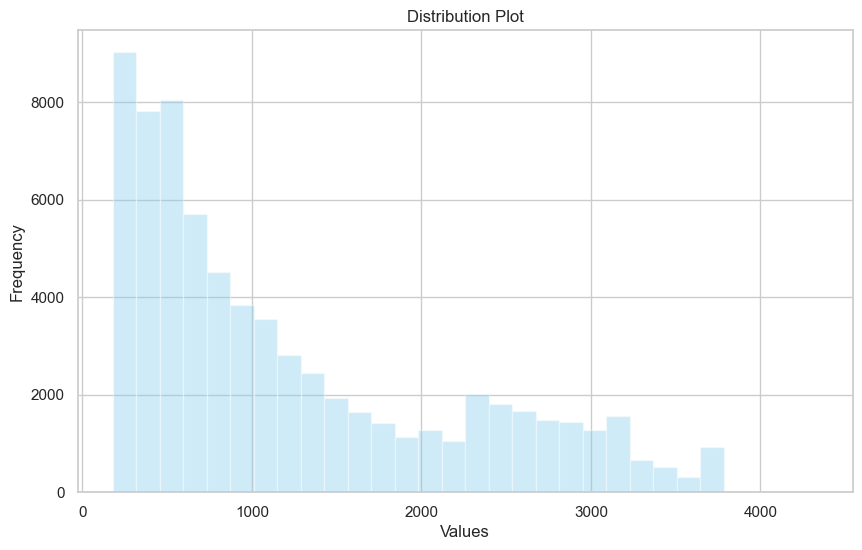

In [25]:
# Assuming data is your dataset and column_name is the column you want to visualize
sns.set(style="whitegrid")  # Set seaborn style for better aesthetics

plt.figure(figsize=(10, 6))
sns.distplot(eda_df['aon'], kde=False, bins=30, color='skyblue')
plt.title('Distribution Plot')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

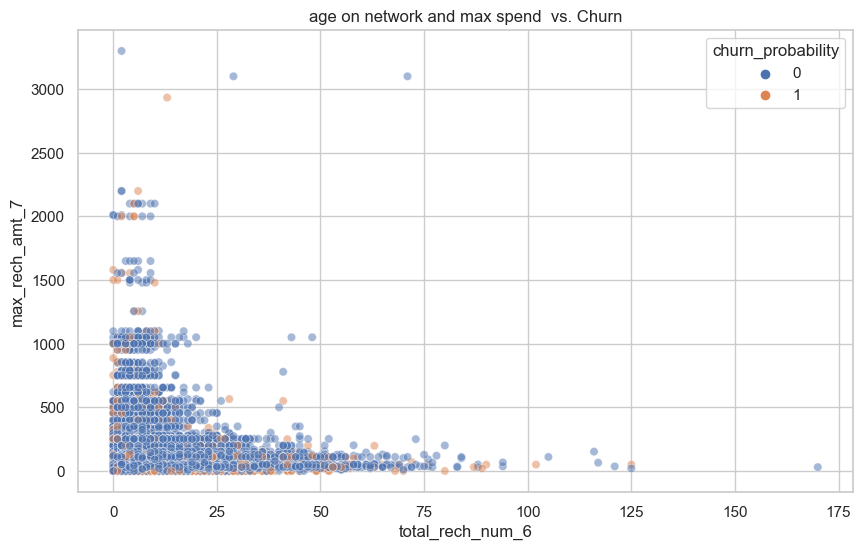

In [26]:
# Assuming eda_df1 is your DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_rech_num_6', y='max_rech_amt_7', hue='churn_probability', data=eda_df, alpha=0.5)
plt.title('age on network and max spend  vs. Churn')
plt.xlabel('total_rech_num_6')
plt.ylabel('max_rech_amt_7')
plt.show()

# Feature Engineering:
1. Create new features that might provide additional information.
2. Encode categorical variables. - there is no feature to perform encoding.
3. Normalize or scale numerical features. - will perform standard scalling.

In [27]:
x=train_1.drop(columns=['churn_probability', 'id'])
y=train_1['churn_probability']

In [28]:
print(train_1.shape)
print(x.shape)
print(y.shape)

(69999, 129)
(69999, 127)
(69999,)


# Train Test Split

In [29]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size = 0.25, random_state=0)

# Pipeline Construction

In [30]:
# Standard Scaler
#Logistic Regression
pipe_lr =Pipeline([('scl', StandardScaler()),
                   ('LR', LogisticRegression(random_state=1))])
# descion tree
pipe_dt =Pipeline([('scl', StandardScaler()),
                   ('DT', DecisionTreeClassifier(random_state=1))])
# Random Forest
pipe_rf =Pipeline([('scl', StandardScaler()),
                   ('RF', RandomForestClassifier(random_state=1))])
# K Nearest Neighbour
pipe_knn =Pipeline([('scl', StandardScaler()),
                   ('KNN', KNeighborsClassifier())])
# #STandard Vector machine
pipe_svm =Pipeline([('scl', StandardScaler()),
                    ('SVM', svm.SVC(random_state=1))])
# XGB
pipe_xgb =Pipeline([('scl', StandardScaler()),
                   ('XGB', XGBClassifier(random_state=1))])

# FIT Model

## Logistic Regression

In [31]:
pipe_lr.fit(x_train, y_train)

Pipeline(steps=[('scl', StandardScaler()),
                ('LR', LogisticRegression(random_state=1))])

In [34]:
pipe_lr.score(x_train, y_train)

0.9322844244652279

In [35]:
pipe_lr.score(x_test, y_test)

0.9265142857142857

In [36]:
print("Logistic Regression Model")

Logistic Regression Model


In [37]:
print("Train=>",pipe_lr.score(x_train, y_train)*100)
print("Test=>",pipe_lr.score(x_test, y_test)*100)

Train=> 93.22844244652279
Test=> 92.65142857142857


In [38]:
print(pipe_lr)

Pipeline(steps=[('scl', StandardScaler()),
                ('LR', LogisticRegression(random_state=1))])


# Decision Tree

In [39]:
#dt_grid_search.fit(x_train, y_train)
pipe_dt.fit(x_train, y_train)

Pipeline(steps=[('scl', StandardScaler()),
                ('DT', DecisionTreeClassifier(random_state=1))])

In [40]:
print("Decision Trees Model")
print("Train",pipe_dt.score(x_train, y_train)*100)
print("Test",pipe_dt.score(x_test, y_test)*100)

Decision Trees Model
Train 100.0
Test 90.45142857142856


# Random Forest

In [41]:
pipe_rf.fit(x_train, y_train)

Pipeline(steps=[('scl', StandardScaler()),
                ('RF', RandomForestClassifier(random_state=1))])

In [42]:
print("Random forest Model")
print("Train",pipe_rf.score(x_train, y_train)*100)
print("Test",pipe_rf.score(x_test, y_test)*100)

Random forest Model
Train 100.0
Test 93.8457142857143


# K-nearest Neighbour

In [43]:
pipe_knn.fit(x_train, y_train)

Pipeline(steps=[('scl', StandardScaler()), ('KNN', KNeighborsClassifier())])

In [44]:
print("K nearest Neighbour Model")
print("Train",pipe_knn.score(x_train, y_train)*100)
print("Test",pipe_knn.score(x_test, y_test)*100)

K nearest Neighbour Model
Train 93.18653688641689
Test 90.38285714285715


# XGB 

In [45]:
pipe_xgb.fit(x_train, y_train)

Pipeline(steps=[('scl', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=1, ...))])

In [46]:
print("XGB Model")
print("Train",pipe_xgb.score(x_train, y_train)*100)
print("Test",pipe_xgb.score(x_test, y_test)*100)

XGB Model
Train 98.23806167736528
Test 93.99428571428572


In [47]:
X_test_pred=pipe_xgb.predict(x_test)
dt_confusion_mat=confusion_matrix(y_test, X_test_pred)
test_accuracy=accuracy_score(y_test, X_test_pred)

In [51]:
print(test_accuracy)

0.9399428571428572


# SVM

In [50]:
pipe_svm.fit(x_train, y_train)

Pipeline(steps=[('scl', StandardScaler()), ('SVM', SVC(random_state=1))])

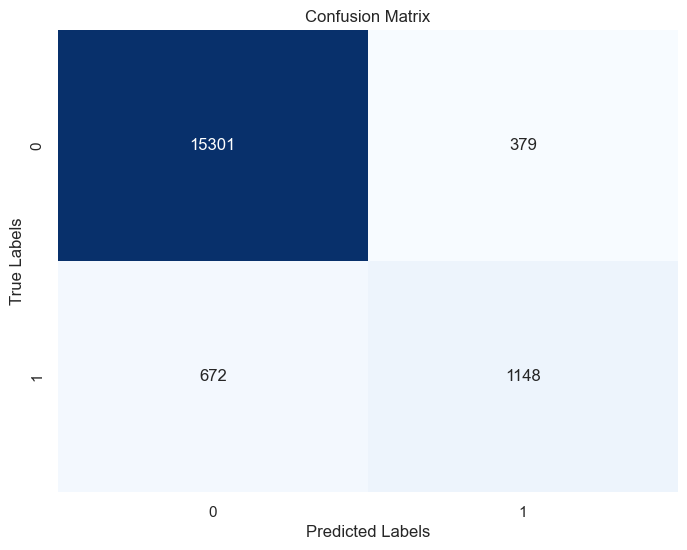

In [52]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dt_confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# TEST DATA

In [53]:
test_data=data_prepration(test)

In [54]:
sample.shape

(30000, 2)

In [55]:
test_data.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,rech_day_6,rech_day_7,rech_day_8
0,69999,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,30,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1692,0.00,0.00,0.00,21,26,24
1,70000,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,250,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2533,0.00,0.00,0.00,19,16,24
2,70001,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,6,9,5,500,1000,1000,300,500,500,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,277,525.61,758.41,241.84,29,27,28
3,70002,43.550,171.390,24.400,5.31,2.16,0.00,40.04,205.01,24.01,0.00,0.00,0.00,0.00,0.00,0.00,5.31,0.00,0.00,2.94,98.61,20.51,0.00,0.00,2.35,0.0,6.18,0.00,8.26,98.61,22.86,0.00,2.16,0.00,37.09,94.36,0.00,0.0,0.0,0.0,37.09,96.53,0.00,0.0,0.0,0.0,0.00,12.03,1.15,0.0,0.0,0.0,45.36,207.18,24.01,58.11,54.64,23.04,487.94,449.83,506.94,0.00,0.38,1.64,546.06,504.86,531.64,0.00,4.26,0.

In [56]:
test_data['churn_probability'] = pipe_xgb.predict(test_data.drop(['id'], axis =1 ))

In [57]:
test_data['churn_probability'].value_counts()

0    27369
1     2631
Name: churn_probability, dtype: int64

In [58]:
sample['churn_probability'].value_counts()

0    30000
Name: churn_probability, dtype: int64

In [61]:
sample_submission=test_data[['id','churn_probability']]
sample_submission.to_csv('submission.csv', index=False)

In [62]:
sample_submission['churn_probability'].value_counts()

0    27369
1     2631
Name: churn_probability, dtype: int64